In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import optimize
from sympy import *
from scipy.io import loadmat
import scipy.optimize as op
from sklearn.preprocessing import OneHotEncoder
from collections import namedtuple
%matplotlib inline

# 1. Neural Network

In [262]:
def sigmoid(z):
    return float(1) / (1 + np.exp(-z))

## 1.1 Visualizing The Data

In [263]:
data = loadmat("ex4data1.mat")
weights = loadmat("ex4weights.mat")

In [264]:
X = data['X']
y = data['y']
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
Thetot = np.concatenate((Theta1.ravel(), Theta2.ravel()))
X.shape, Theta1.shape, Theta2.shape, y.shape

((5000, 400), (25, 401), (10, 26), (5000, 1))

(-0.5, 199.5, 19.5, -0.5)

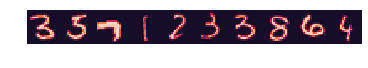

In [265]:
samples = np.random.choice(X.shape[0], 10)
plt.imshow(X[samples,:].reshape(-1,20).transpose())
plt.axis('off')

## 1.2 Model Representation

In [266]:
def feedforwardPropagtion(X, theta1, theta2):
    a1 = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    z2 = np.dot(a1, theta1.transpose())
    a2 = np.insert(sigmoid(z2), 0, np.ones(z2.shape[0]), axis=1)
    z3 = np.dot(a2, theta2.transpose())
    a3 = sigmoid(z3)
    return namedtuple("_", ["a1", "z2", "a2", "z3", "a3"])(a1, z2, a2, z3, a3)

In [269]:
def nnCostFunction(Theta_1_2, X, y, gama, hidden_layer_size):
    K = len(np.unique(y)) # num of classes
    
    X = np.matrix(X)
    y_k = np.matrix(pd.get_dummies(y.ravel()))
    m, n = X.shape # n = num of features, m = num of samples
    
    theta1 = np.reshape(Theta_1_2[:hidden_layer_size * (n + 1)], (hidden_layer_size, n+1))
    theta2 = np.reshape(Theta_1_2[hidden_layer_size * (n + 1):], (K, hidden_layer_size + 1))
    
    ffPropogation = feedforwardPropagtion(X, theta1, theta2)
    
    J_theta = 0
    
    for i in range(0, m):
        firstArg = -np.log(ffPropogation.a3[i, :]) * (y_k[i, :].T)
        secondArg = np.log(1-ffPropogation.a3[i, :]) * ((1-y_k[i, :]).T)
        J_theta += np.sum(firstArg - secondArg)

    regArg = (float(gama)/(2*m)) * (np.sum(np.square(theta1[1:])) + np.sum(np.square(theta2[1:])))
    
    J_theta /= m
    J_theta += regArg
    return J_theta
    
    
nnCostFunction(Thetot, X, y, 1, 25)

0.37904640005669155

# 2. Backpropagation

In [270]:
def sigmoidGrad(z):
    return np.multiply(sigmoid(z), (1-sigmoid(z)))